In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### One Hot Coding

In [4]:
df = pd.read_csv("/Users/woowahan/Documents/Python/Lec_Data_Mining/Lec05/Default.csv", index_col=0)

In [5]:
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.62507
2,No,Yes,817.180407,12106.13470
3,No,No,1073.549164,31767.13895
4,No,No,529.250605,35704.49394
5,No,No,785.655883,38463.49588


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 390.6+ KB


In [6]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [7]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [21]:
df_dummies = pd.get_dummies(df['student'], prefix = 'student')

df_dummies.head()

,student_No,student_Yes
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0


In [22]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

In [23]:
df['default_le'] = le.fit_transform(df['default'])

In [24]:
df1 = pd.concat([df, df_dummies], axis=1)

df1.head()

,default,student,balance,income,default_le,student_No,student_Yes
1,No,No,729.526495,44361.62507,0,1,0
2,No,Yes,817.180407,12106.13470,0,0,1
3,No,No,1073.549164,31767.13895,0,1,0
4,No,No,529.250605,35704.49394,0,1,0
5,No,No,785.655883,38463.49588,0,1,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 7 columns):
default        10000 non-null object
student        10000 non-null object
balance        10000 non-null float64
income         10000 non-null float64
default_le     10000 non-null int64
student_No     10000 non-null uint8
student_Yes    10000 non-null uint8
dtypes: float64(2), int64(1), object(2), uint8(2)
memory usage: 488.3+ KB


In [26]:
df2 = df1.loc[:, 'balance':]

In [27]:
df2.head()

,balance,income,default_le,student_No,student_Yes
1,729.526495,44361.62507,0,1,0
2,817.180407,12106.13470,0,0,1
3,1073.549164,31767.13895,0,1,0
4,529.250605,35704.49394,0,1,0
5,785.655883,38463.49588,0,1,0


In [32]:
from sklearn.model_selection import train_test_split

X = df2.drop('default_le', axis=1)
y = df2['default_le']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(7500, 4)
(2500, 4)
(7500,)
(2500,)


In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [35]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
logreg.score(X_test, y_test)

0.968

### Binning
- continous to categorical

In [38]:
ad = pd.read_csv("/Users/woowahan/Documents/Python/Lec_Data_Mining/Lec05/Advertising.csv", index_col=0)

In [39]:
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [40]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


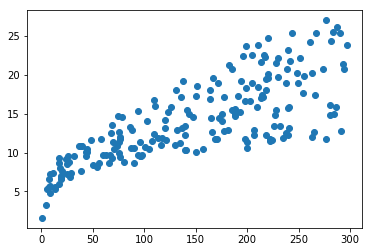

In [41]:
plt.scatter(ad['TV'], ad['Sales'])

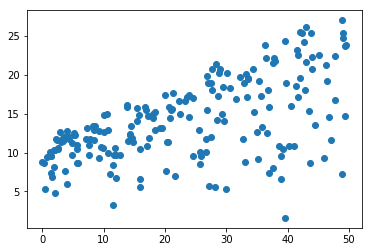

In [42]:
plt.scatter(ad['Radio'], ad['Sales'])

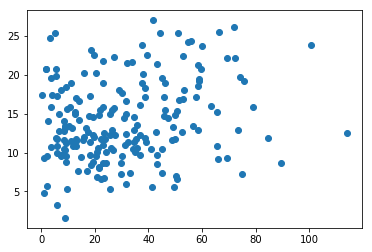

In [43]:
plt.scatter(ad['Newspaper'], ad['Sales'])

In [78]:
from sklearn.model_selection import train_test_split

X = ad['TV'][:, None]
y = ad['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [80]:
lr.score(X_test, y_test) #r-sqaured

0.6606120390330493

In [81]:
pred_lr = lr.predict(X_test)
true = np.array(y_test)

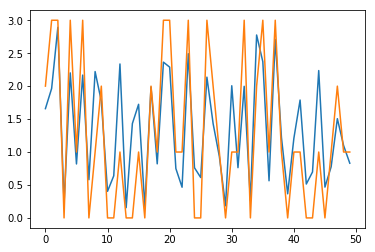

In [107]:
#pd.Series(pred).plot()
pd.Series(pred_lr).plot()
pd.Series(true).plot()

- Mean Absolute Error (MAE) is the mean of the absolute value of the errors
$$ \frac 1n\sum_{i=1}^n|y_i - \hat{y}_i| $$

- Mean Squared Error (MSE) is the mean of the squared errors
$$ \frac 1n\sum_{i=1}^n(y_i - \hat{y}_i)^2 $$

- Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors
$$ \sqrt{\frac 1n\sum_{i=1}^n(y_i - \hat{y}_i)^2} $$

In [83]:
print("R-sqaure:", r2_score(y_test, pred_lr))
print("MAE:", mean_absolute_error(y_test, pred_lr))
print("MSE:", mean_squared_error(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))

('R-sqaure:', 0.6606120390330493)
('MAE:', 2.2737705943708724)
('MSE:', 9.179298570399792)
('RMSE:', 3.029735726164873)


In [84]:
# binning numeric y to categorical y

y.head(10)

1     22.1
2     10.4
3      9.3
4     18.5
5     12.9
6      7.2
7     11.8
8     13.2
9      4.8
10    10.6
Name: Sales, dtype: float64

In [85]:
y.describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [86]:
pd.cut(y, bins=[0,10,13,17,27], labels=range(4)).head(10)

1     3
2     1
3     0
4     3
5     1
6     0
7     1
8     2
9     0
10    1
Name: Sales, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [88]:
# frequency
pd.cut(y, bins=[0,10,13,17,27], labels=range(4)).value_counts().sort_index()

0    45
1    57
2    42
3    56
Name: Sales, dtype: int64

In [89]:
pd.qcut(y, 4, labels=range(4))[:10]

1     3
2     1
3     0
4     3
5     1
6     0
7     1
8     2
9     0
10    1
Name: Sales, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [91]:
# frequency
pd.qcut(y, 4, labels=range(4)).value_counts().sort_index()

0    50
1    52
2    49
3    49
Name: Sales, dtype: int64

In [92]:
y_bin = pd.qcut(y, 4, labels=range(4))

y_bin.head(10)

1     3
2     1
3     0
4     3
5     1
6     0
7     1
8     2
9     0
10    1
Name: Sales, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, random_state=42)

In [94]:
lr = LinearRegression().fit(X_train, y_train)

In [95]:
pred_lr = lr.predict(X_test)
true = np.array(y_test)

In [96]:
print("R-sqaure:", r2_score(y_test, pred_lr))
print("MAE:", mean_absolute_error(y_test, pred_lr))
print("MSE:", mean_squared_error(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))

('R-sqaure:', 0.6724421883991435)
('MAE:', 0.5285340301164256)
('MSE:', 0.4036822470168955)
('RMSE:', 0.6353599350107744)


### Polynomial

In [97]:
ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [139]:
X = ad.drop("Sales", axis=1)
y = ad.Sales

In [140]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [141]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [142]:
# X ** 2차항 추가
# include_bias=True 절편 1 추가
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [143]:
# 1st^2, 1st*2nd, 2nd^2, 1st*3rd, 2nd^2, 2nd*3rd, 3rd^2

pd.DataFrame(X_poly).head()

,0,1,2,3,4,5,6,7,8
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

In [145]:
lr_poly = LinearRegression().fit(X_train, y_train)

In [146]:
print(lr_poly.score(X_train, y_train))
print(lr_poly.score(X_test, y_test))

0.9908358976493915
0.9719735711900084


In [147]:
pred_poly = lr_poly.predict(X_test)
true = np.array(y_test)

In [149]:
print("R-sqaure:", r2_score(y_test, pred_poly))
print("MAE:", mean_absolute_error(y_test, pred_poly))
print("MSE:", mean_squared_error(y_test, pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_poly)))

('R-sqaure:', 0.9719735711900084)
('MAE:', 0.5287370141587526)
('MSE:', 0.7899390213297339)
('RMSE:', 0.8887851378875178)


### Poly vs Scaling vs Original

In [150]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [151]:
boston = load_boston()

In [152]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [153]:
# scaled
scaler = MinMaxScaler(feature_range=(0,1))

In [154]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [155]:
X_train_scaled = scaler.transform(X_train)

In [156]:
X_test_scaled = scaler.transform(X_test)

In [157]:
# poly
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False).fit(X_train_scaled) # interaction_only = True : 상호작용 항만 선택

In [158]:
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [159]:
print(X_train.shape)
print(X_train_poly.shape)

(379, 13)
(379, 105)


In [160]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [161]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)

In [162]:
# scaled
ridge.score(X_test_scaled, y_test)

0.6213701408454401

In [163]:
X_train_scaled.shape

(379, 13)

In [164]:
ridge = Ridge().fit(X_train_poly, y_train)

In [165]:
# poly
ridge.score(X_test_poly, y_test)

0.7534233848054691

In [166]:
X_train_poly.shape

(379, 105)

In [180]:
# original
ridge = Ridge().fit(X_train, y_train)

In [181]:
ridge.score(X_test, y_test)

0.6265116223767428

In [182]:
X_train.shape

(379, 13)

### Distribution Transformation

In [183]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["target"])

df = pd.concat([dfX, dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [185]:
# orginal

ridge.score(X_test, y_test)

0.6265116223767428

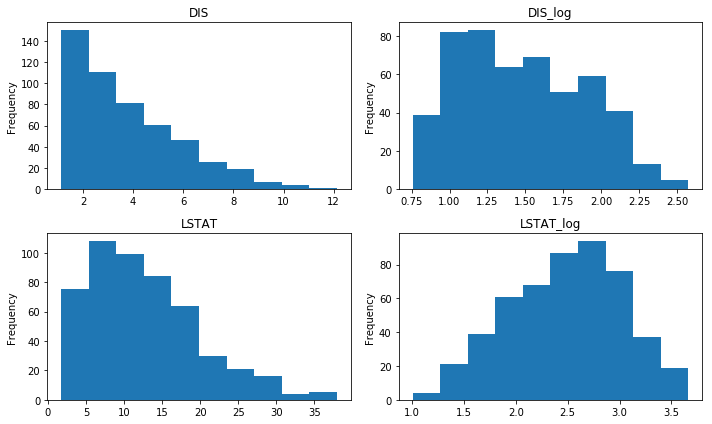

In [186]:
plt.figure(figsize=(10,6))

plt.subplot(221)
df['DIS'].plot(kind='hist')
plt.title("DIS")

plt.subplot(222)
np.log(df['DIS'] + 1).plot(kind='hist')
plt.title("DIS_log")

plt.subplot(223)
df['LSTAT'].plot(kind='hist')
plt.title("LSTAT")

plt.subplot(224)
np.log(df['LSTAT'] + 1).plot(kind='hist')
plt.title("LSTAT_log")

plt.tight_layout()

In [189]:
df['DIS_log'] = np.log(df['DIS'] + 1)
df['LSTAT_log'] = np.log(df['LSTAT'] + 1)

df_log = df.drop(['DIS', 'LSTAT'], axis=1)

In [190]:
df_log.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,target,DIS_log,LSTAT_log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,1.0,296.0,15.3,396.90,24.0,1.627278,1.788421
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,2.0,242.0,17.8,396.90,21.6,1.786261,2.316488
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,2.0,242.0,17.8,392.83,34.7,1.786261,1.615420
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,3.0,222.0,18.7,394.63,33.4,1.954757,1.371181
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,3.0,222.0,18.7,396.90,36.2,1.954757,1.845300


In [191]:
X_train, X_test, y_train, y_test = train_test_split(df_log.drop('target', axis=1), df_log.target, random_state=0)

In [193]:
ridge_log = Ridge().fit(X_train, y_train)

In [194]:
ridge_log.score(X_test, y_test)

0.6929577639384377

### Feature Selection (k-best)

In [195]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [196]:
cancer.data.shape

(569, 30)

In [197]:
cancer.target.shape

(569,)

In [198]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50)) # rows:cancer data, cols: 50

In [199]:
noise

array([[ 0.49671415, -0.1382643 ,  0.64768854, ...,  1.05712223,
         0.34361829, -1.76304016],
       [ 0.32408397, -0.38508228, -0.676922  , ...,  0.26105527,
         0.00511346, -0.23458713],
       [-1.41537074, -0.42064532, -0.34271452, ..., -1.32045661,
         0.52194157,  0.29698467],
       ...,
       [ 1.11295534,  0.14004307,  0.95501349, ...,  0.05174335,
         1.64878597, -0.13855742],
       [-0.36133539, -0.02436784,  2.17920511, ...,  0.10180644,
        -0.39580383, -0.41925995],
       [ 0.1547812 , -1.00213838, -1.00802206, ...,  0.4845971 ,
         0.14160101, -1.11543425]])

In [200]:
noise.shape

(569, 50)

In [201]:
# merge
X_w_noise = np.hstack([cancer.data, noise])

In [202]:
X_w_noise.shape

(569, 80)

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [204]:
print(X_train.shape)
print(X_test.shape)

(284, 80)
(285, 80)


In [205]:
select = SelectPercentile(percentile=50)

In [206]:
select.fit(X_train, y_train)

/Users/woowahan/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x10cac1c08>)

In [207]:
X_train_selected = select.transform(X_train)

In [208]:
X_train_selected.shape

(284, 40)

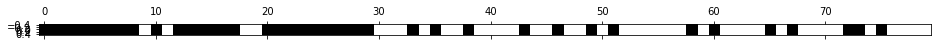

In [209]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [210]:
from sklearn.feature_selection import SelectKBest, f_classif

kbest = SelectKBest(k=40, score_func=f_classif)

In [211]:
X_train_kbest = kbest.fit_transform(X_train, y_train)

In [212]:
X_train_kbest.shape

(284, 40)

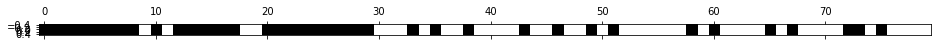

In [213]:
mask = kbest.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [214]:
# compare orig. vs kbest
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [215]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [216]:
lr.score(X_test, y_test)

0.9298245614035088

In [217]:
X_test_kbest = kbest.transform(X_test)

In [218]:
lr.fit(X_train_kbest, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [219]:
lr.score(X_test_kbest, y_test)

0.9403508771929825

### Feature Selection (model based)

In [220]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [221]:
select = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=42), threshold = "median")

In [222]:
select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
        prefit=False, threshold='median')

In [223]:
X_train_l1 = select.transform(X_train)

In [224]:
print(X_train.shape)
print(X_train_l1.shape)

(284, 80)
(284, 40)


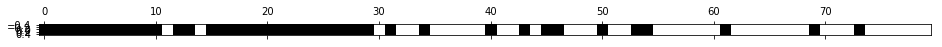

In [225]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [226]:
X_test_l1 = select.transform(X_test)

In [227]:
lr = LogisticRegression().fit(X_train_l1, y_train)

In [228]:
lr.score(X_test_l1, y_test)

0.9508771929824561

### RFE

In [229]:
from sklearn.feature_selection import RFE

In [230]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select = 40)

In [231]:
select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

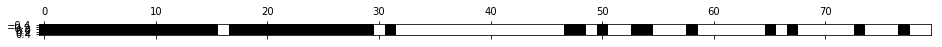

In [232]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [233]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [234]:
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(284, 40)
(285, 40)


In [236]:
lr = LogisticRegression().fit(X_train_rfe, y_train)
lr.score(X_test_rfe, y_test)

0.9508771929824561

### Scaling

In [237]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,DIS_log,LSTAT_log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.627278,1.788421
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1.786261,2.316488
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.786261,1.615420
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.954757,1.371181
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.954757,1.845300


In [257]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [258]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [259]:
X_train_scaled_mm = scaler.fit_transform(X_train)
X_test_scaled_mm = scaler.fit_transform(X_test)

In [260]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,DIS_log,LSTAT_log
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,1.479648,2.475610
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.413390,0.539033
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.755934,1.004302
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,1.131459,2.073162
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,1.436855,2.514464
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,1.822659,2.887869
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,2.574633,3.662792


In [261]:
X_train.min(axis=0).astype(int)

array([  7,   9,  47, 170,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         6,   0,   0,   0,   0,   0,   0,   8,  12,  54, 223,   0,   0,
         0,   0,   0,   0])

In [264]:
X_train_scaled_mm.max()

1.0000000000000002

In [265]:
X_train_scaled_mm.min()

0.0

In [267]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [268]:
X_train_scaled = scaler.fit_transform(X_train)

In [269]:
X_test_scaled = scaler.fit_transform(X_test)

In [270]:
X_train_scaled.min(axis=0)

array([-1.78055563, -2.18781464, -1.76624417, -1.33579748, -3.13182932,
       -1.60466061, -1.13451957, -1.2494428 , -2.76387542, -1.8246721 ,
       -1.01953641, -1.57004095, -1.00009114, -0.699534  , -1.42008811,
       -1.35007961, -1.18989877, -1.94114052, -1.32359234, -1.24078605,
       -1.54791307, -2.20367053, -1.54889435, -1.13424736, -2.25060307,
       -1.41565272, -1.32679038, -1.72428691, -2.22527121, -1.62340891])

In [271]:
X_train_scaled.max(axis=0)

array([ 3.87703921,  4.57816025,  3.87874304,  5.07930714,  3.31715286,
        4.57194745,  3.67045265,  3.6017045 ,  4.55814787,  4.95669223,
        8.77462793,  4.96922029,  9.19820772, 10.57748989,  7.67032999,
        6.43799149, 10.35405707,  4.78442086,  7.04457127,  7.89229358,
        4.06200652,  3.86384481,  4.25078989,  5.85506131,  3.95582853,
        4.40228469,  4.79219658,  2.61701423,  6.26141508,  5.01948881])

In [272]:
from sklearn.svm import SVC

svm = SVC()

In [273]:
svm_orig = svm.fit(X_train, y_train)

In [274]:
svm_orig.score(X_test, y_test)

0.6293706293706294

In [275]:
svm_mm = svm.fit(X_train_scaled_mm, y_train) # z-score

In [276]:
svm_mm.score(X_test_scaled_mm, y_test)

0.916083916083916

In [277]:
svm_stdsc = svm.fit(X_train_scaled, y_train) # z-score

In [278]:
svm_stdsc.score(X_test_scaled, y_test)

0.951048951048951

### PCA

In [279]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [280]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [281]:
X_scaled = scaler.fit_transform(cancer.data)

In [283]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [284]:
X_scaled.shape

(569, 30)

In [285]:
from sklearn.decomposition import PCA

In [286]:
pca = PCA(n_components = 7)

In [287]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [288]:
X_pca = pca.transform(X_scaled)

In [289]:
X_pca.shape

(569, 7)

In [290]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734])

In [291]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 ])

In [293]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
5,0.018741,-0.032179,0.017309,-0.001888,-0.286375,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030874,0.498927,-0.080224
6,-0.124089,0.011399,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108830,0.140473,-0.060488,-0.167966,-0.018492,0.374658


In [294]:
pca = PCA(n_components = 4)

In [295]:
X_pca = pca.fit_transform(X_scaled)

In [296]:
X_pca.shape

(569, 4)

In [297]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034767,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077054


In [299]:
from sklearn.cluster import KMeans

In [300]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [301]:
kmeans = KMeans(n_clusters=3)

In [302]:
kmeans.fit(cancer.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [303]:
kmeans.labels_

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,